In [1]:
import os
import sys
os.environ['CUDA_HOME'] = '/u/local/cuda/12.3'
os.environ['PATH'] = f"/u/local/cuda/12.3/bin:{os.environ['PATH']}"

In [2]:
!pip --version
!conda --version
!nvcc --version
!mamba --version

pip 24.2 from /u/home/c/cobeaman/.local/lib/python3.10/site-packages/pip (python 3.10)
conda 23.1.0
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Wed_Nov_22_10:17:15_PST_2023
Cuda compilation tools, release 12.3, V12.3.107
Build cuda_12.3.r12.3/compiler.33567101_0
mamba 1.5.5
conda 23.11.0


In [3]:
!conda env list
!conda list
!mamba env list
!mamba list
!pip list

# conda environments:
#
                         /u/home/c/cobeaman/apps/miniconda
base                     /u/local/apps/anaconda3/2023.03
bioinf                   /u/local/apps/anaconda3/2023.03/envs/bioinf
pytorch-2.0-gpu          /u/local/apps/anaconda3/2023.03/envs/pytorch-2.0-gpu

# packages in environment at /u/local/apps/anaconda3/2023.03:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             5.1                       1_gnu  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda-client           1.11.1          py310h06a4308_0  
anaconda-navigator        2.4.0           py310h06a4308_0  
anaconda-project          0.11.1          py310h06a4308_0  
anyio                     3.5.0           py310h06a4308_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0         

# conda environments:
#
                         /u/home/c/cobeaman/apps/miniconda
base                     /u/local/apps/mambaforge/23.11.0
arcgis                   /u/local/apps/mambaforge/23.11.0/envs/arcgis
myjupyterhub             /u/local/apps/mambaforge/23.11.0/envs/myjupyterhub

# packages in environment at /u/local/apps/mambaforge/23.11.0:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                 conda_forge    conda-forge
_openmp_mutex             4.5                       2_gnu    conda-forge
anyio                     4.3.0              pyhd8ed1ab_0    conda-forge
archspec                  0.2.2              pyhd8ed1ab_0    conda-forge
argon2-cffi               23.1.0             pyhd8ed1ab_0    conda-forge
argon2-cffi-bindings      21.2.0          py310h2372a71_4    conda-forge
arrow                     1.3.0              pyhd8ed1ab_0    conda-forge
asttokens                 2.4.1              pyhd8ed1ab_0    conda-fo

Package                       Version
----------------------------- ---------------
alabaster                     0.7.12
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anndata                       0.10.8
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array_api_compat              1.8
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryo

wheel                         0.38.4
widgetsnbextension            3.5.2
wrapt                         1.14.1
wurlitzer                     3.0.2
xarray                        2022.11.0
yapf                          0.31.0
zict                          3.0.0
zipp                          3.11.0
zope.interface                5.4.0
zstandard                     0.19.0


In [ ]:
# !conda create -y -n my-conda-env
# !source activate my-conda-env
# !conda create -n rapids-24.10 -c rapidsai-nightly -c conda-forge -c nvidia  \
#     rapids=24.10 python=3.9 'cuda-version>=12.0,<=12.5' -y

In [ ]:
# Install cuDF and dask_cudf from the RAPIDS channel
# !mamba create --prefix ~/.conda/envs/my_rapids_env -c rapidsai-nightly -c conda-forge -c nvidia  \
#     rapids=24.10 python=3.10 'cuda-version>=12.0,<=12.5' -y

In [ ]:
# !pip install \
#     --extra-index-url=https://pypi.anaconda.org/rapidsai-wheels-nightly/simple \
#     cudf-cu12 dask-cudf-cu12 dask-cuda --only-binary=:all:

In [4]:
# !pip install pandas==2.2.1 FuzzyTM numpy pyaging scipy seaborn matplotlib -U
# !pip freeze > requirements.txt
import cupy as cp
import inspect
import shutil
import json
import cudf
import dask_cudf
from dask_cuda import LocalCUDACluster
import dask
from dask.distributed import Client, wait
import torch
import pandas as pd
import pyaging as pya
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load a small portion of the file with pandas
sample = cudf.read_csv('/u/project/ophoff/cobeaman/Tools/DNAmGrimAgeGitHub/input/mymetharray_final_2458_r_731788_c_08092024_081841.csv', nrows=1)

# Extract the column names and dtypes
dtypes = sample.dtypes.to_dict()

In [7]:
# Determine the number of bytes for one row
sample_size_bytes = sample.memory_usage(deep=True).sum()

# Multiply by 2 to ensure we capture at least one full row
sample_size = sample_size_bytes * 2

In [ ]:
# cluster.close()  # Close the cluster
# client.close()  # Close the Dask client and release the port

# # Set up the Dask CUDA cluster and specify the dashboard address and port
# cluster = LocalCUDACluster()  # Use port 8789 or any other available port
# client = Client()

In [37]:
# Load methylation data subset
methylation_data_subset = cudf.read_csv('/u/project/ophoff/cobeaman/Tools/DNAmGrimAgeGitHub/input/mymetharray_subset_2458_r_653_c_08092024_082626.csv').set_index('SampleID')

In [40]:
# Check data types
print(methylation_data_subset['Female'].dtype)

# Check for missing values
print(methylation_data_subset['Female'].isnull().sum())

# Ensure 'Female' column is binary (0 or 1)
# methylation_data_final['Female'] = (methylation_data_final['Female'] == 1).astype(int)
# methylation_data_subset['Female'] = (methylation_data_subset['Female'] == 1).astype(int)

# Handle any missing data (if necessary)
# methylation_data_final.dropna(inplace=True)
# methylation_data_subset.dropna(inplace=True)

int64
112


In [41]:
# Convert the cuDF DataFrame to a pandas DataFrame
methylation_data_subset_pd = methylation_data_subset.to_pandas()

# Convert DataFrames to AnnData objects
# adata_final = pya.pp.df_to_adata(methylation_data_final, metadata_cols=['Female', 'age'], imputer_strategy='knn')
adata_subset = pya.pp.df_to_adata(methylation_data_subset_pd, metadata_cols=['Female', 'Age'], imputer_strategy='knn')

|-----> 🏗️ Starting df_to_adata function
|-----> ⚙️ Create anndata object started
|-----> ✅ Create anndata object finished [0.0032s]
|-----> ⚙️ Add metadata to anndata started
|-----------> Adding provided metadata to adata.obs
|-----> ✅ Add metadata to anndata finished [0.0010s]
|-----> ⚙️ Log data statistics started
|-----------> There are 2458 observations
|-----------> There are 650 features
|-----------> Total missing values: 0
|-----------> Percentage of missing values: 0.00%
|-----> ✅ Log data statistics finished [0.0030s]
|-----> ⚙️ Impute missing values started
|-----------> No missing values found. No imputation necessary
|-----> ✅ Impute missing values finished [0.0025s]
|-----> 🎉 Done! [0.0152s]


In [42]:
# Predict age using GrimAge2 for both datasets
# pya.pred.predict_age(adata_final, ['GrimAge2'])
pya.pred.predict_age(adata_subset, ['GrimAge2'])

|-----> 🏗️ Starting predict_age function
|-----> ⚙️ Set PyTorch device started
|-----------> Using device: cuda
|-----> ✅ Set PyTorch device finished [0.0010s]
|-----> 🕒 Processing clock: grimage2
|-----------> ⚙️ Load clock started
|-----------------> Data found in pyaging_data/grimage2.pt
|-----------> ✅ Load clock finished [0.0063s]
|-----------? ⚠️ Clock 'grimage2' is for research purposes only. Please check the clock's documentation or notes for more information.
|-----------> ⚙️ Check features in adata started
|-----------------? 382 out of 1032 features (37.02%) are missing: ['cg00036119', 'cg00456299', 'cg00480331'], etc.
|-----------------> Using reference feature values for grimage2
|-----------> ⚠️ Check features in adata finished [0.0072s]
|-----------> ⚙️ Predict ages with model started
|-----------------> There is no preprocessing necessary
|-----------------> The postprocessing method is cox_to_years
|-----------------> in progress: 100.0000%
|-----------> ✅ Predict ages

/u/home/c/cobeaman/.local/lib/python3.10/site-packages/pyaging/predict/_pred_utils.py:87: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  clock = torch.load(weights_path)


|-----> 🎉 Done! [4.5758s]


In [43]:
# Inspect the columns in the obs DataFrame
print(adata_subset.obs.columns)

Index(['Female', 'Age', 'grimage2'], dtype='object')


In [44]:
# View the first few rows of predictions
# print(adata_final.obs[['GrimAge2']].head())
print(adata_subset.obs.head())

# Save predictions to CSV files
# adata_final.obs[['GrimAge2']].to_csv('GrimAge2_predictions_final.csv')
adata_subset.obs.to_csv('GrimAge2_predictions_subset.csv')

             Female   Age   grimage2
SampleID                            
431-BG00001     1.0  51.0  65.079639
431-BG00002     1.0  33.0  63.292219
431-BG00003     0.0  49.0  66.126912
431-BG00004     0.0  41.0  71.779736
431-BG00006     0.0  64.0  67.194093


In [73]:
# Replace inf with NaN and drop rows where either value is NaN
valid_data = adata_subset.obs[['Age', 'grimage2']].replace([np.inf, -np.inf], np.nan).dropna()

# Extract the synchronized age and grimage2 arrays
age_clean = valid_data['Age']
grimage2_clean = valid_data['grimage2']

# Calculate Pearson correlation
pearson_corr, pearson_p_value = stats.pearsonr(age_clean, grimage2_clean)

# Calculate Spearman correlation (robust to non-linearity)
spearman_corr, spearman_p_value = stats.spearmanr(age_clean, grimage2_clean)

# Calculate Kendall correlation (robust to outliers)
kendall_corr, kendall_p_value = stats.kendalltau(age_clean, grimage2_clean)

In [87]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /u/home/c/cobeaman/.local/lib/python3.10/site-packages
Requires: matplotlib, numpy, pandas
Required-by: 


In [89]:
!pip install seaborn -U
import seaborn as sns
print(sns.__version__)

Defaulting to user installation because normal site-packages is not writeable
0.12.2


/u/local/apps/anaconda3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/u/local/apps/anaconda3/2023.03/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


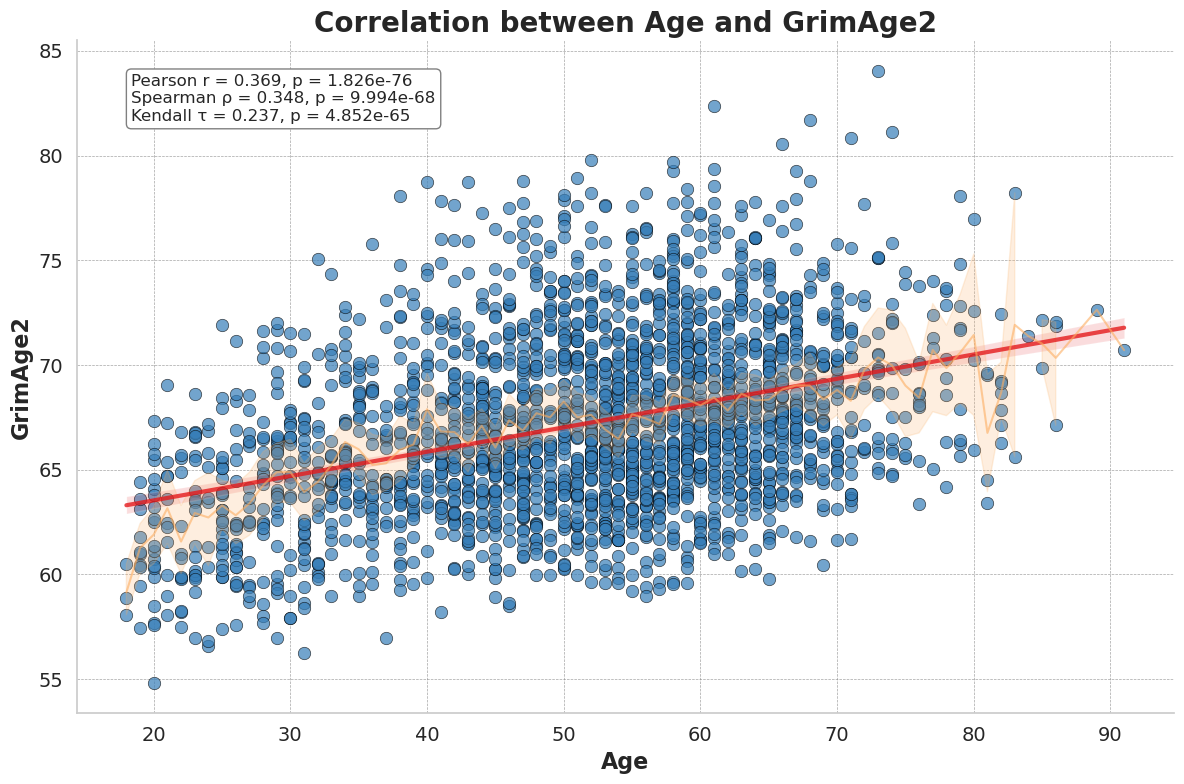

In [77]:
# Set the theme and style for the plot
sns.set_theme(style="whitegrid")

# Create the figure and axis objects
plt.figure(figsize=(12, 8))

# Use seaborn's regplot for scatter plot with regression line
sns.regplot(x=age_clean, y=grimage2_clean, ci=95, 
            scatter_kws={"s": 80, "alpha": 0.7, "color": "#377eb8", "edgecolor": "black", "linewidth": 0.5},
            line_kws={"color": "#e41a1c", "linewidth": 3, "alpha": 0.8})

# Add a line plot with confidence interval
sns.lineplot(x=age_clean, y=grimage2_clean, errorbar=('ci', 95), lw=1.5, color='#fdae61', alpha=0.6)

# Add titles and labels with enhanced font size
plt.title('Correlation between Age and GrimAge2', fontsize=20, weight='bold')
plt.xlabel('Age', fontsize=16, weight='bold')
plt.ylabel('GrimAge2', fontsize=16, weight='bold')

# Annotate the plot with the correlation coefficients
annotation_text = (
    f"Pearson r = {pearson_corr:.3f}, p = {pearson_p_value:.3e}\n"
    f"Spearman ρ = {spearman_corr:.3f}, p = {spearman_p_value:.3e}\n"
    f"Kendall τ = {kendall_corr:.3f}, p = {kendall_p_value:.3e}"
)
plt.text(0.05, 0.95, annotation_text, 
         ha='left', va='top', transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white"))

# Customize the ticks and labels for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add grid lines
plt.grid(visible=True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Remove the top and right spines for a cleaner look
sns.despine()

# Tight layout to make sure everything fits without overlapping
plt.tight_layout()

# Save the plot as an SVG file for high resolution
plt.savefig('Age_vs_GrimAge2_Correlation_Enhanced.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()

In [45]:
model = pya.models.GrimAge2()

In [46]:
model.metadata.update({
    "clock_name": 'grimage2',
    "data_type": 'methylation',
    "species": 'Homo sapiens',
    "year": 2022,
    "approved_by_author": '⌛',
    "citation": "Lu, Ake T., et al. \"DNA methylation GrimAge version 2.\" Aging (Albany NY) 14.23 (2022): 9484.",
    "doi": "https://doi.org/10.18632/aging.204434",
    "research_only": True,
    "notes": None
})

In [47]:
urls = [
    "https://pyaging.s3.amazonaws.com/supporting_files/grimage2_subcomponents.csv",
    "https://pyaging.s3.amazonaws.com/supporting_files/grimage2.csv",
    "https://pyaging.s3.amazonaws.com/supporting_files/datMiniAnnotation3_Gold.csv",
]
dir = "."
logger = pya.logger.Logger()

for url in urls:
    pya.utils.download(url, dir, logger, indent_level=1)


|-----------> Data found in ./grimage2_subcomponents.csv
|-----------> Data found in ./grimage2.csv
|-----------> Data found in ./datMiniAnnotation3_Gold.csv


In [24]:
# Load feature sets from CSV files
df = pd.read_csv('grimage2_subcomponents.csv', index_col=0)
df_grimage = pd.read_csv('grimage2.csv', index_col=0)

# Identify features
all_features = np.unique(df['var'])[2:].tolist() + ['Female', 'Age']
model.features = all_features

In [25]:
# Function to load weights for subcomponents
def load_model_weights(y_pred, model_attr):
    indices = torch.tensor([all_features.index(item) for item in df.loc[df['Y.pred'] == y_pred, 'var'] if item in all_features]).long()
    model_layer = pya.models.LinearModel(input_dim=len(indices))
    model_layer.linear.weight.data = torch.tensor(df.loc[df['Y.pred'] == y_pred, 'beta'][1:].values).unsqueeze(0).float()
    model_layer.linear.bias.data = torch.tensor(df.loc[df['Y.pred'] == y_pred, 'beta'].iloc[0]).float()
    setattr(model, model_attr, model_layer)
    setattr(model, f'features_{model_attr}', indices)

# Apply the function to each subcomponent
components = {
    'DNAmPACKYRS': 'PACKYRS', 
    'DNAmadm': 'ADM', 
    'DNAmB2M': 'B2M',
    'DNAmCystatin_C': 'CystatinC', 
    'DNAmGDF_15': 'GDF15',
    'DNAmleptin': 'Leptin',
    'DNAmpai_1': 'PAI1',
    'DNAmTIMP_1': 'TIMP1',
    'DNAmlog.CRP': 'LogCRP',
    'DNAmlog.A1C': 'A1C'
}

for y_pred, model_attr in components.items():
    load_model_weights(y_pred, model_attr)

# Load base model weights
base_model = pya.models.LinearModel(input_dim=len(df_grimage))
base_model.linear.weight.data = torch.tensor(df_grimage['beta'].tolist()).unsqueeze(0).float()
base_model.linear.bias.data = torch.tensor([0]).float()
model.base_model = base_model

In [26]:
reference_df = pd.read_csv('datMiniAnnotation3_Gold.csv', index_col=0)
model.reference_values = reference_df.loc[model.features[:-2]]['gold'].tolist() + [1, 65]  # Example: 65-year-old female

In [27]:
model.preprocess_name = None
model.preprocess_dependencies = None
model.postprocess_name = 'cox_to_years'
model.postprocess_dependencies = None

In [28]:
pya.utils.print_model_details(model)


%==================================== Model Details ====================================%
Model Attributes:

training: True
metadata: {'approved_by_author': '⌛',
 'citation': 'Lu, Ake T., et al. "DNA methylation GrimAge version 2." Aging '
             '(Albany NY) 14.23 (2022): 9484.',
 'clock_name': 'grimage2',
 'data_type': 'methylation',
 'doi': 'https://doi.org/10.18632/aging.204434',
 'notes': None,
 'research_only': True,
 'species': 'Homo sapiens',
 'version': None,
 'year': 2022}
reference_values: [0.422480272528644, 0.935109546405548, 0.0162959729801047, 0.502691053893618, 0.910839576323153, 0.710155040209873, 0.479121329208521, 0.905888314944049, 0.279992670790348, 0.117900358329507, 0.940987438881091, 0.761621096809391, 0.0721244934513398, 0.0851830172952001, 0.222068390557704, 0.103705423432714, 0.91516014793103, 0.748331163695382, 0.903928589429489, 0.524090323888757, 0.894685558616447, 0.647988638853782, 0.0581747999131966, 0.830024180811995, 0.209808614636345, 0.324296

In [30]:
# Define the directory path
weights_dir = "../weights"

# Create the directory if it doesn't exist
os.makedirs(weights_dir, exist_ok=True)

# Save the model
torch.save(model, os.path.join(weights_dir, f"{model.metadata['clock_name']}.pt"))

In [35]:
print(methylation_data_subset_pd.columns)
missing_features = [feature for feature in model.features if feature not in methylation_data_subset_pd.columns]
print("Missing features:", missing_features)

Index(['Age', 'Female', 'cg22866430', 'cg18234973', 'cg26110733', 'cg10636246',
       'cg10578779', 'cg17591574', 'cg13371627', 'cg12458003',
       ...
       'cg20361594', 'cg13029847', 'cg00126959', 'cg16067628', 'cg23777956',
       'cg06418475', 'cg09438320', 'cg16416603', 'cg00744433', 'cg08706141'],
      dtype='object', length=652)
Missing features: ['cg00036119', 'cg00456299', 'cg00480331', 'cg00554421', 'cg00564555', 'cg00684178', 'cg00695391', 'cg00706683', 'cg00892703', 'cg01026009', 'cg01057893', 'cg01130991', 'cg01206872', 'cg01308343', 'cg01337813', 'cg01431830', 'cg01491219', 'cg01517384', 'cg01518025', 'cg01564693', 'cg01624571', 'cg01641177', 'cg01687878', 'cg01702009', 'cg01704252', 'cg01708387', 'cg01817885', 'cg01823956', 'cg01939962', 'cg01997410', 'cg02019988', 'cg02081065', 'cg02193806', 'cg02291424', 'cg02311013', 'cg02356786', 'cg02395454', 'cg02495445', 'cg02505126', 'cg02514143', 'cg02515033', 'cg02587153', 'cg02591356', 'cg02627240', 'cg02633924', 'cg02758

In [36]:
# Extract relevant features
# Adjust the model's features list to include only those present in the data
available_features = [feature for feature in model.features if feature in methylation_data_subset_pd.columns]
input_data_subset = methylation_data_subset_pd[available_features].values

# # Convert to tensor and run the model
# input_tensor_final = torch.tensor(input_data_final, dtype=torch.float32)
# model.eval()
# model.to(float)
# pred = model(input_tensor_final)
# print(pred)

# Convert to tensor and run the model
input_tensor_subset = torch.tensor(input_data_subset, dtype=torch.float32)
model.eval()
model.to(float)
pred = model(input_tensor_subset)
print(pred)

IndexError: index 852 is out of bounds for dimension 0 with size 652

In [ ]:
def remove_folder(path):
    try:
        shutil.rmtree(path)
        print(f"Deleted folder: {path}")
    except Exception as e:
        print(f"Error deleting folder {path}: {e}")

# Get a list of all files and folders in the current directory
all_items = os.listdir('.')        

In [ ]:
for item in os.listdir('.'):
    if os.path.isfile(item) and not item.endswith('.ipynb'):
        os.remove(item)
    elif os.path.isdir(item):
        shutil.rmtree(item)